In [2]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import svm
import scipy.io

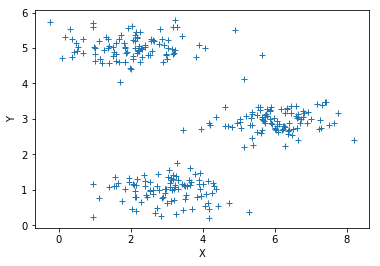

In [78]:
mat = scipy.io.loadmat('./ex7/ex7data2.mat')
X = mat.get('X')

plt.plot(X[:,0], X[:,1], '+')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [125]:
def computeDistance(centroid):
    return lambda row: np.sum((row - centroid) ** 2, axis=0)

def findClosestCentroids(X, centroids):
    distances = []
    for centroid in centroids:
        distances.append(np.apply_along_axis(computeDistance(centroid), axis=1, arr=X))
        
    return np.argmin(np.column_stack(distances), axis=1)

def computeCentroids(X, idx, K):
    centroids = []
    for i in range(0, K):
        centroids.append(np.mean(X[idx == i], axis=0))
    return np.array(centroids)

def runkMeans(X, K, initial_centroids, max_iters):
    centroids = initial_centroids
    centroid_hist = [centroids]
    for _ in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K);
        centroid_hist.append(centroids)
        
    return centroids, idx, np.array(centroid_hist)

In [83]:
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples (should be [1 3 2]): %s' % (idx[0:3] + 1))

centroids = computeCentroids(X, idx, K);

print('The centroids should be:');
print('[[ 2.428301 3.157924 ]');
print(' [ 5.813503 2.633656 ]');
print(' [ 7.119387 3.616684 ]\n');
print('Centroids computed after initial finding of closest centroids:\n%s' % centroids)

Closest centroids for the first 3 examples (should be [1 3 2]): [1 3 2]
The centroids should be:
[[ 2.428301 3.157924 ]
 [ 5.813503 2.633656 ]
 [ 7.119387 3.616684 ]

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


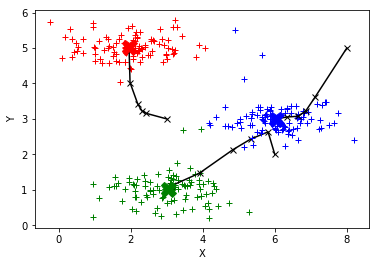

In [131]:
K = 3
max_iters = 10;
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

centroids, idx, centroid_hist = runkMeans(X, K, initial_centroids, max_iters)

colors = ['red', 'green', 'blue']
for k in range(K):
    plt.plot(X[idx == k][:,0], X[idx == k][:,1], '+', color=colors[k])
    plt.plot(centroid_hist[:,k,0], centroid_hist[:,k,1], '-x', color='black')
    plt.plot(centroids[k,0], centroids[k,1], 'X', color=colors[k], markersize=15)

    
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# TODO: 
#  - cost function
#  - random initialization
#  - chart for number of clusters